In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Read the data

#Data Description

In [3]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [4]:
data.tail(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.80,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
print(data.shape)
print("No.of rows in the dataset:",data.shape[0])
print("No.of columns in the dataset:",data.shape[1])

(8523, 12)
No.of rows in the dataset: 8523
No.of columns in the dataset: 12


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
Numerical_value=[feature for feature in data.columns if data[feature].dtype!="O"]
categorical_value=[feature for feature in data.columns if data[feature].dtype=="O"]


In [10]:
print("We have {} numrerical values in dataset".format(len(Numerical_value)))
print("We have {} categorical values in dataset".format(len(categorical_value)))

We have 5 numrerical values in dataset
We have 7 categorical values in dataset


#DATA PREPROCESSING

# 1.Convert Categorical values into Numerical values:
# 2.Check the null values in the dataset:

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
labelEncoder=LabelEncoder()

data["Item_Identifier"]=labelEncoder.fit_transform(data["Item_Identifier"])
data["Item_Fat_Content"]=labelEncoder.fit_transform(data["Item_Fat_Content"])
data["Item_Type"]=labelEncoder.fit_transform(data["Item_Type"])
data["Outlet_Identifier"]=labelEncoder.fit_transform(data["Outlet_Identifier"])
data["Outlet_Size"]=labelEncoder.fit_transform(data["Outlet_Size"])
data["Outlet_Location_Type"]=labelEncoder.fit_transform(data["Outlet_Location_Type"])
data["Outlet_Type"]=labelEncoder.fit_transform(data["Outlet_Type"])

In [13]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.1 KB


In [15]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Filling Null values with Simple Imputation:

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
Imputation=SimpleImputer(strategy='mean')

Imputed_data=Imputation.fit_transform(data)

print(Imputed_data)


[[1.5600000e+02 9.3000000e+00 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 3.7351380e+03]
 [8.0000000e+00 5.9200000e+00 2.0000000e+00 ... 2.0000000e+00
  2.0000000e+00 4.4342280e+02]
 [6.6200000e+02 1.7500000e+01 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 2.0972700e+03]
 ...
 [1.3570000e+03 1.0600000e+01 1.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.1931136e+03]
 [6.8100000e+02 7.2100000e+00 2.0000000e+00 ... 2.0000000e+00
  2.0000000e+00 1.8455976e+03]
 [5.0000000e+01 1.4800000e+01 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 7.6567000e+02]]


In [18]:
Final_data=pd.DataFrame(Imputed_data,columns=data.columns)

Final_data


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999.0,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009.0,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999.0,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998.0,3.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987.0,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987.0,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002.0,3.0,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004.0,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009.0,1.0,2.0,2.0,1845.5976


In [19]:
Final_data.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# EDA (Expolartary Data Analysics):   KDE= Kernel Distrubution Function


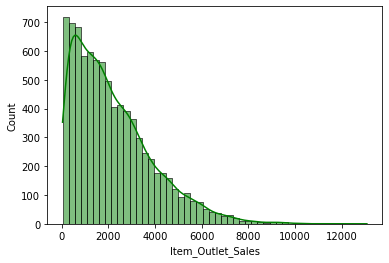

In [20]:
sns.histplot(data=data,x=data["Item_Outlet_Sales"],bins=50,kde="True",color="g")
plt.show()

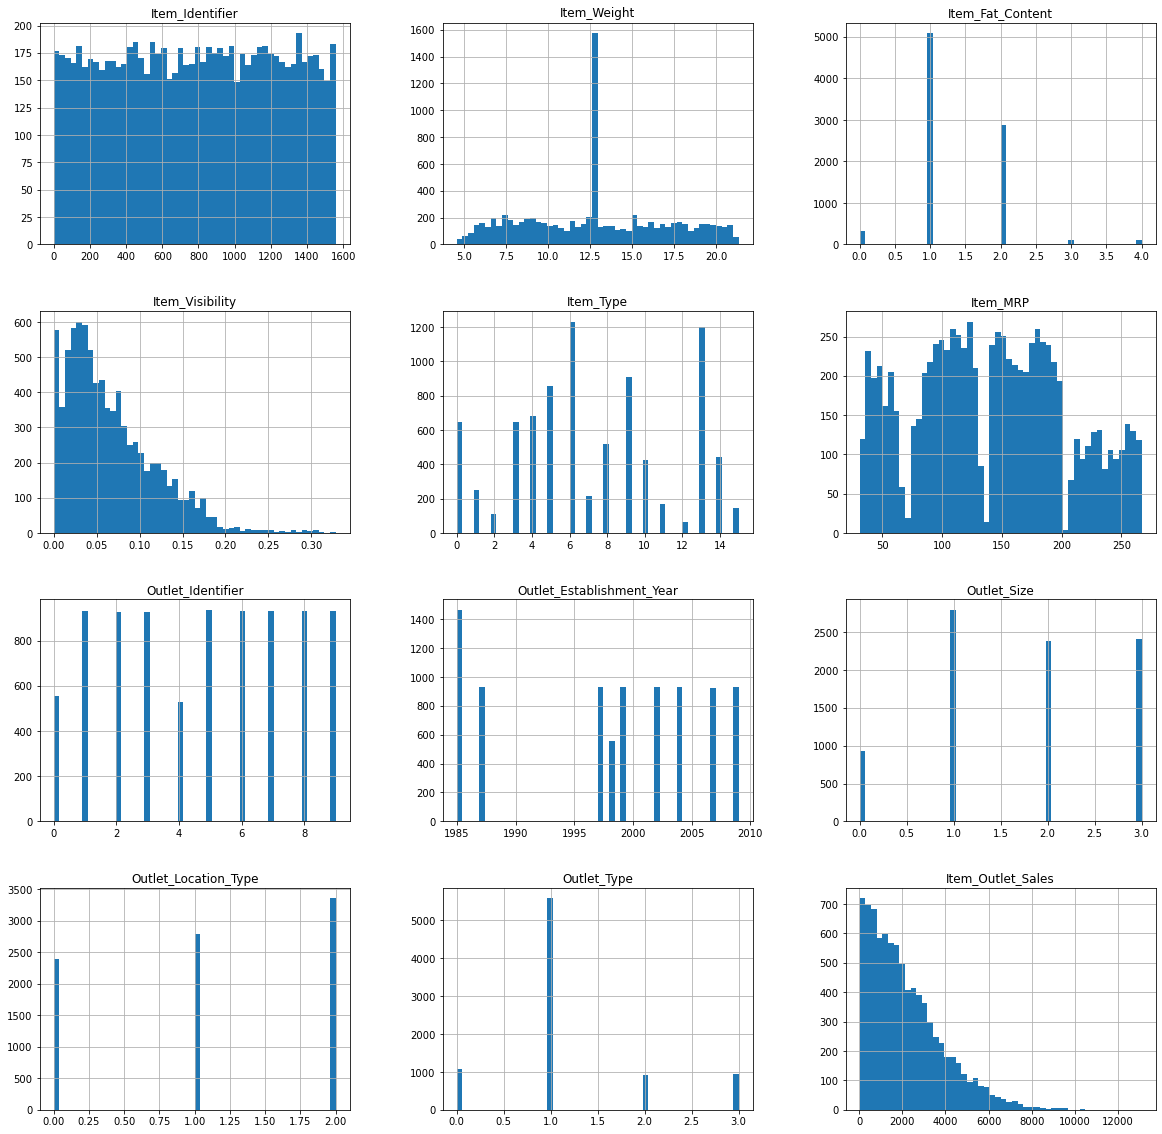

In [21]:
Final_data.hist(bins=50,figsize=(20,20))
plt.show()


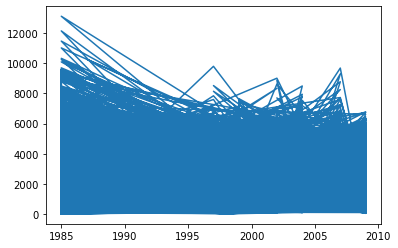

In [22]:
plt.plot(data["Outlet_Establishment_Year"],data["Item_Outlet_Sales"])
plt.show()

 # Correlation:


In [23]:
Final_data.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.000855,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.015096,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.098114,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.004795,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.087796,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,0.000827,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,-0.002473,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.053224,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.470343,-0.089216,-0.122304,-0.049135
Outlet_Size,0.000855,-0.015096,-0.004795,0.087796,0.000827,-0.002473,0.053224,0.470343,1.000000,-0.290216,-0.432062,-0.172477
Outlet_Location_Type,0.003656,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.290216,1.000000,0.467219,0.089367


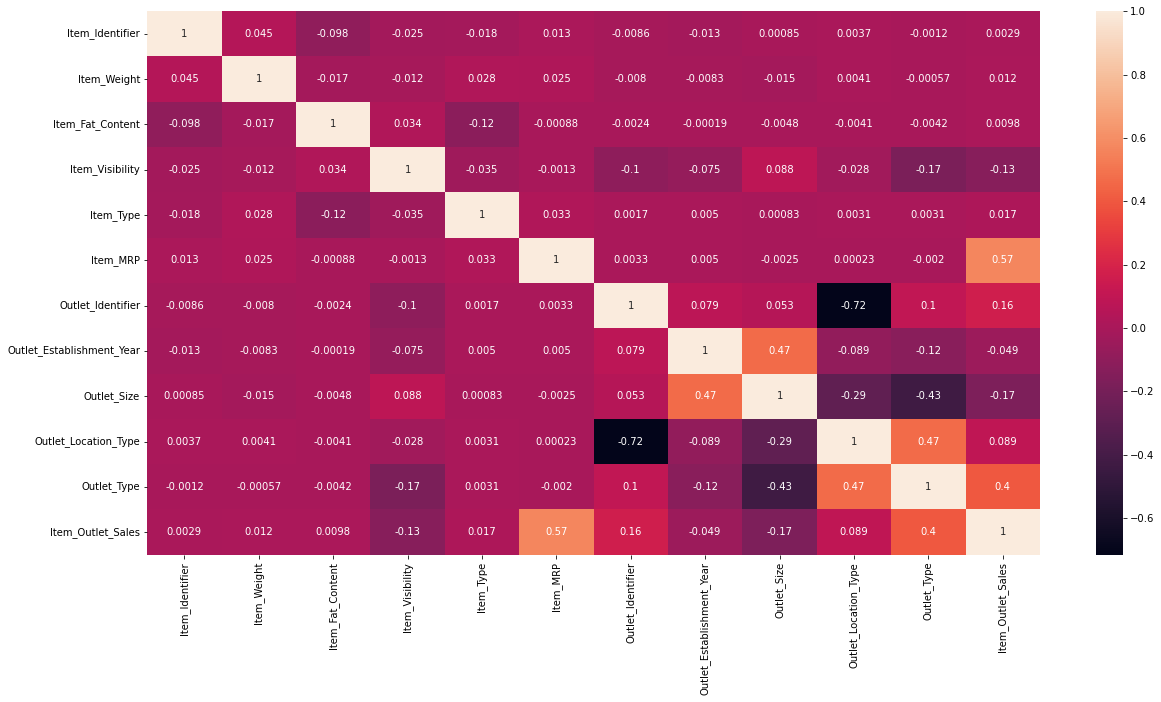

In [24]:
fig,ax=plt.subplots(figsize=(20,10))
sns.heatmap(Final_data.corr(),annot=True)
plt.show()

 # Splitting the data into Two features ( x -- Dependent & y -- Independent features):

In [25]:
x=Final_data.drop(["Item_Outlet_Sales"],axis=1)
x.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156.0,9.30,1.0,0.016047,4.0,249.8092,9.0,1999.0,1.0,0.0,1.0
1,8.0,5.92,2.0,0.019278,14.0,48.2692,3.0,2009.0,1.0,2.0,2.0


In [26]:
y=Final_data["Item_Outlet_Sales"]
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# Feature Selection Method: (RFE: Recursive Feature Elimination)

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
LR=LinearRegression()
rfe=RFE(LR,n_features_to_select=8)

rfe.fit(x,y)

selected_features=x.columns[rfe.support_]

print(selected_features)


Index(['Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [29]:
X=Final_data.drop(["Item_Weight","Item_Type","Item_Identifier","Item_Outlet_Sales"],axis=1)
X

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.0,0.016047,249.8092,9.0,1999.0,1.0,0.0,1.0
1,2.0,0.019278,48.2692,3.0,2009.0,1.0,2.0,2.0
2,1.0,0.016760,141.6180,9.0,1999.0,1.0,0.0,1.0
3,2.0,0.000000,182.0950,0.0,1998.0,3.0,2.0,0.0
4,1.0,0.000000,53.8614,1.0,1987.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...
8518,1.0,0.056783,214.5218,1.0,1987.0,0.0,2.0,1.0
8519,2.0,0.046982,108.1570,7.0,2002.0,3.0,1.0,1.0
8520,1.0,0.035186,85.1224,6.0,2004.0,2.0,1.0,1.0
8521,2.0,0.145221,103.1332,3.0,2009.0,1.0,2.0,2.0


In [30]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

 # Splitting the Dataset into Training and Testing Data: ( Training_data=80% , Testing_data=20%)


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(6818, 8)
(1705, 8)
(6818,)
(1705,)


# Model Training:

In [34]:
LR=LinearRegression()
LR.fit(X_train,y_train)
LR.score(X_test,y_test)


0.4783082172210802

In [35]:
y_pred_LR=LR.predict(X_test)

In [36]:
from sklearn.metrics import r2_score,mean_squared_error

In [37]:
print("MSE:",mean_squared_error(y_test,y_pred_LR))
print("R-squared value:",r2_score(y_test,y_pred_LR))


MSE: 1608159.1726406056
R-squared value: 0.4783082172210802


In [38]:
from sklearn.linear_model import Ridge


In [39]:
RG=Ridge()
RG.fit(X_train,y_train)
RG.score(X_test,y_test)


0.4782710276604022

In [40]:
y_pred_RG=RG.predict(X_test)

In [41]:
print("MSE:",mean_squared_error(y_test,y_pred_RG))
print("R-squared value:",r2_score(y_test,y_pred_RG))

MSE: 1608273.81261598
R-squared value: 0.4782710276604022


In [42]:
from sklearn.linear_model import Lasso

In [43]:
LS=Lasso()
LS.fit(X_train,y_train)
LS.score(X_test,y_test)


0.4780055911101462

In [44]:
y_pred_LS=LS.predict(X_test)

In [45]:
print("MSE:",mean_squared_error(y_test,y_pred_LS))
print("R-squared value:",r2_score(y_test,y_pred_LS))

MSE: 1609092.0432976566
R-squared value: 0.4780055911101462


In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
DT=DecisionTreeRegressor()
DT.fit(X_train,y_train)
DT.score(X_test,y_test)

0.22106188811438943

In [48]:
y_pred_DT=DT.predict(X_test)

In [49]:
print("MSE:",mean_squared_error(y_test,y_pred_DT))
print("R-squared value:",r2_score(y_test,y_pred_DT))

MSE: 2401142.80289334
R-squared value: 0.22106188811438943


In [50]:
from sklearn.ensemble import RandomForestRegressor


In [51]:
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
RF.score(X_test,y_test)


0.5346959183963951

In [52]:
y_pred_RF=RF.predict(X_test)


In [53]:
print("MSE:",mean_squared_error(y_test,y_pred_RF))
print("R-squared value:",r2_score(y_test,y_pred_RF))


MSE: 1434339.3007113056
R-squared value: 0.5346959183963951


In [54]:
from sklearn.svm import SVR

In [55]:
SV=SVR(kernel='linear')
SV.fit(X_train,y_train)
SV.score(X_test,y_test)

0.45310776953264875

In [56]:
y_pred_SV=SV.predict(X_test)

In [57]:
print("MSE:",mean_squared_error(y_test,y_pred_SV))
print("R-squared value:",r2_score(y_test,y_pred_SV))


MSE: 1685841.6902546023
R-squared value: 0.45310776953264875


In [58]:
from sklearn.ensemble import GradientBoostingRegressor

In [59]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
GBR.score(X_test,y_test)


0.5654948728670532

In [60]:
y_pred_GBR=GBR.predict(X_test)

In [61]:
print("MSE:",mean_squared_error(y_test,y_pred_GBR))
print("R-squared value:",r2_score(y_test,y_pred_GBR))


MSE: 1339398.9110507714
R-squared value: 0.5654948728670532


In [62]:
!pip install xgboost==1.5.1

In [63]:
from xgboost import XGBRegressor


In [64]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
XGB.score(X_test,y_test)

0.5150058126204113

In [65]:
y_pred_XGB=XGB.predict(X_test)

In [66]:
print("MSE:",mean_squared_error(y_test,y_pred_XGB))
print("R-squared value:",r2_score(y_test,y_pred_XGB))

MSE: 1495035.7219683963
R-squared value: 0.5150058126204113


# Hyperparameter Tuning:


In [67]:
param_grid={
    'max_depth': [100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [200, 300]
    }


In [68]:
RF_HY=RandomForestRegressor()

In [69]:
from sklearn.model_selection import GridSearchCV

grid_search=GridSearchCV(estimator=RF_HY,cv=3,param_grid=param_grid)
grid_search.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [100, 110], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [200, 300]})

In [70]:
grid_search.best_params_

{'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 300}

In [71]:
RF_HYP=RandomForestRegressor(max_depth= 110,
 max_features= 3,
 min_samples_leaf= 5,
 min_samples_split=12,
 n_estimators= 300)
RF_HYP.fit(X_train,y_train)
RF_HYP.score(X_test,y_test)

0.5640197747670482

In [72]:
y_pred_RF_HYP=RF_HYP.predict(X_test)

In [73]:
print("MSE:",mean_squared_error(y_test,y_pred_RF_HYP))
print("R-squared value:",r2_score(y_test,y_pred_RF_HYP))

MSE: 1343946.026068439
R-squared value: 0.5640197747670482


In [74]:
param_grid={
    'learning_rate': [0.01,0.001],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [200, 300]
    }

In [75]:
GBR_HY=GradientBoostingRegressor()

In [76]:
grid_search=GridSearchCV(estimator=GBR_HY,cv=3,param_grid=param_grid)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.001], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 4],
                         'min_samples_split': [8, 10],
                         'n_estimators': [200, 300]})

In [77]:
GBR_HYP=GradientBoostingRegressor()
GBR_HYP.fit(X_train,y_train)
GBR.score(X_test,y_test)

0.5654948728670532

In [78]:
y_pred_GBR_HYP=GBR_HYP.predict(X_test)

In [79]:
print("MSE:",mean_squared_error(y_test,y_pred_GBR_HYP))
print("R-squared value:",r2_score(y_test,y_pred_GBR_HYP))

MSE: 1339164.3318576687
R-squared value: 0.565570971078931


In [80]:
import pickle

In [81]:
with open(r"C:\Users\91924\Desktop\Python\Datasets\RF.pkl", "wb") as file:
    pickle.dump(RF_HYP, file)

In [82]:
X.columns

Index(['Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [85]:
Item_Fat_Content=float(input("Enter the value:  "))
Item_Visibility=float(input("Enter the value:   "))
Item_MRP=float(input("Enter the value:   "))
Outlet_Identifier=float(input("Enter the value:   "))
Outlet_Establishment_Year=int(input("Enter the value:   "))
Outlet_Size=float(input("Enter the value:   "))
Outlet_Location_Type=float(input("Enter the value:   "))
Outlet_Type=float(input("Enter the value:    "))

Enter the value:  28.3
Enter the value:   19.5
Enter the value:   35.0
Enter the value:   27.6
Enter the value:   2016
Enter the value:   29.8
Enter the value:   34.0
Enter the value:    16.4


In [86]:
unknown_value=[Item_Fat_Content, Item_Visibility, Item_MRP, Outlet_Identifier,
       Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type,Outlet_Type]


In [87]:
loaded_model = pickle.load(open(r"C:\Users\91924\Desktop\Python\Datasets\RF.pkl", 'rb'))

In [88]:
y_predict=loaded_model.predict([unknown_value])

In [89]:
y_predict[0]

998.8126687970309

In [90]:
print("predicted Sales Amount is RS:",y_predict[0])


predicted Sales Amount is RS: 998.8126687970309
